In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [56]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [58]:
query = "Ryan Reaves"
# data collected after Ryan Reaves illegal hit to head to Darnell Nurse
# https://bsky.app/profile/tictactomar.bsky.social/post/3lb4alxl22k26

In [59]:
df = pd.read_csv('/content/sample_data/bluesky_posts_ryan-reaves.csv')
df.head()

,Content
0,That will be the last we see of Ryan Reaves fo...
1,We’ll see if this app can survive The Great Ry...
2,"also, just to make sure it's clear \n\nthat's ..."
3,UPDATE: Ryan Reaves got 5 games for that hit
4,Ryan Reaves is out of the game for this hit on...


In [60]:
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

In [61]:
# encoded = tokenizer(df['Content'][0], return_tensors='pt')
# output = model(**encoded_text)
# scores = output[0][0].detach().numpy()
# scores = softmax(scores)
# scores_dict = {
#     'roberta_neg': scores[0],
#     'roberta_neu': scores[1],
#     'roberta_pos': scores[2]
# }
# print(scores_dict)

In [62]:
def calculate_hf_scores(text):
    preprocessed_text = preprocess_text(text)

    encoded_text = tokenizer(preprocessed_text, return_tensors='pt')
    output = model(**encoded_text)

    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    result_dict = {
        'neg': scores[0],
        'neu': scores[1],
        'pos': scores[2]
    }
    return result_dict


In [63]:
result = {}

for i, row in df.iterrows():
    try:
      text = row['Content']
      hf_result = calculate_hf_scores(text)

      result[i] = hf_result
    except RuntimeError:
      pass

In [64]:
result

{0: {'neg': 0.028489193, 'neu': 0.8856392, 'pos': 0.085871644},
 1: {'neg': 0.02137771, 'neu': 0.76399076, 'pos': 0.21463148},
 2: {'neg': 0.31428617, 'neu': 0.6494338, 'pos': 0.03628005},
 3: {'neg': 0.015709072, 'neu': 0.8655821, 'pos': 0.11870881},
 4: {'neg': 0.048057828, 'neu': 0.91019505, 'pos': 0.041747164},
 5: {'neg': 0.36848983, 'neu': 0.6205113, 'pos': 0.010998836},
 6: {'neg': 0.079157166, 'neu': 0.8952646, 'pos': 0.02557823},
 7: {'neg': 0.27831572, 'neu': 0.5733423, 'pos': 0.14834191},
 8: {'neg': 0.23101969, 'neu': 0.7223977, 'pos': 0.046582654},
 9: {'neg': 0.018750971, 'neu': 0.5279999, 'pos': 0.45324916},
 10: {'neg': 0.20889693, 'neu': 0.7484488, 'pos': 0.042654276},
 11: {'neg': 0.015411923, 'neu': 0.29333648, 'pos': 0.69125164},
 12: {'neg': 0.12505016, 'neu': 0.8558831, 'pos': 0.019066751},
 13: {'neg': 0.48812023, 'neu': 0.49988505, 'pos': 0.011994695},
 14: {'neg': 0.96071136, 'neu': 0.03495631, 'pos': 0.004332322},
 15: {'neg': 0.12964775, 'neu': 0.8450989, 'po

In [65]:
results_df = pd.DataFrame(result).T
results_df = results_df
results_df = results_df.merge(df, left_index=True, right_index=True)

In [66]:
results_df.head()

,neg,neu,pos,Content
0,0.028489,0.885639,0.085872,That will be the last we see of Ryan Reaves fo...
1,0.021378,0.763991,0.214631,We’ll see if this app can survive The Great Ry...
2,0.314286,0.649434,0.036280,"also, just to make sure it's clear \n\nthat's ..."
3,0.015709,0.865582,0.118709,UPDATE: Ryan Reaves got 5 games for that hit
4,0.048058,0.910195,0.041747,Ryan Reaves is out of the game for this hit on...


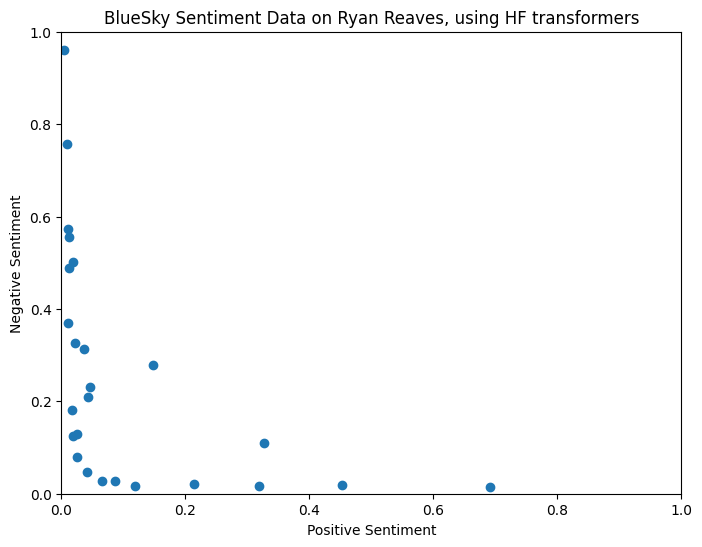

In [68]:

plt.figure(figsize=(8, 6))
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.scatter(results_df['pos'], results_df['neg'])
plt.xlabel('Positive Sentiment')
plt.ylabel('Negative Sentiment')
plt.title(f'BlueSky Sentiment Data on {query}, using HF transformers')
plt.show()